## This is a basic demo of going from data to a network using the functions in utilities.py

In [30]:
%run -i ../src/utilities.py

In [31]:
#####

import datetime
import os
from pathlib import Path

DATASET_NAME = "Okimflemingiae_DD_RPKM"

ROOT_PATH = Path(__file__).resolve().parents[1]

FIGURE_PATH = ROOT_PATH / "figs"
FIGURE_PATH.mkdir(exist_ok=True)

TF_PATH = ROOT_PATH / "transcription_factors"

dataset = load_dataset(DATASET_NAME)

#####

In [32]:
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['savefig.bbox'] = 'tight'

In [33]:
view_data_toc()

,Process,Condition,Sampling Frequency,Sampling Duration,Dataset,Type,PMID
Organism,,,,,,,
Saccharomyces cerevisiae,Cell Cycle,Wild-type replicate 1,16 min,254 min,Scerevisiae_WT_r1_Microarray,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,Wild-type replicate 2,16 min,262 min,Scerevisiae_WT_r2_Microarray,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,Wild-type,5 min,245 min,Scerevisiae_RNAseq,RNAseq,27918582
Saccharomyces cerevisiae,Cell Cycle,No APC activity replicate 1,20 min,300 min,Scerevisiae_noAPC_r1,Microarray,25200947
Saccharomyces cerevisiae,Cell Cycle,No APC activity replicate 2,20 min,360 min,Scerevisiae_noAPC_r2,Microarray,25200947
Saccharomyces cerevisiae,Cell Cycle,No cyclin-CDK activity replicate 1,16 min,262 min,Scerevisiae_noCDK_r1,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,No cyclin-CDK activity replicate 2,16 min,254 min,Scerevisiae_noCDK_r2,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,DNA Damage Checkpoint activated replicate 1,Uneven,260 min,Scerevisiae_DRC_r1,Microarray,25200947
Saccharomyces cerevisiae,Cell Cycle,DNA Damage Checkpoint activated replicate 2,Uneven,260 min,Scerevisiae_DRC_r2,Microarray,25200947


### Loading data in and how to check and handle duplicate gene names

In [34]:
dataset.head() # <-- adding .head() allows you to view the top few rows of a dataframe

,4,8,12,16,20,24,28,32,36,40,44,48
time_points,,,,,,,,,,,,
Ophio5|1000,15.978522,19.222255,8.462312,17.608235,8.608888,1.610910,15.484599,15.877299,12.206973,16.300000,3.520457,5.116088
Ophio5|1001,275.267059,343.781882,108.561150,343.914350,102.521979,41.899832,169.682988,245.963367,125.302082,290.829506,69.910771,86.104409
Ophio5|1002,11.645763,9.666387,22.475157,13.059055,28.198244,73.443188,9.885276,8.217323,9.647158,8.562906,27.637694,18.390368
Ophio5|1003,0.000000,0.062734,0.000000,0.000000,0.069775,0.000000,0.000000,0.076594,0.000000,0.000000,0.000000,0.134604
Ophio5|1004,16.833148,8.774343,52.811643,28.628546,53.999905,182.167032,17.377108,8.284545,16.313668,14.244907,70.909921,35.560886


In [35]:
# Use this function on your dataframe to see if the data contains any duplicate gene names. Having duplicate gene names will cause headaches later in your analyses.
duplicate_check(dataset)

This dataset has no duplicate gene names.


True

### Running periodicity algorithms on a dataset

In [36]:
# pyDL

# SPEED_UP_FACTOR = 10

# min_period = 23
# max_period = 25
# period_step = 1
# avg_period = 24
# filename = DATASET_NAME
# numb_reg=1000000 // SPEED_UP_FACTOR
# numb_per=100000 // SPEED_UP_FACTOR
# return_results=False
# num_proc=5

# datetimestr = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
# data_path = f'../tmp/{filename}__{datetimestr}.tsv'
# dataset.to_csv(data_path, sep='\t')

# print('Running pyDL')
# results_path = run_pydl(data_path, avg_period, data_path, numb_reg=numb_reg, numb_per=numb_per, return_results=return_results, is_tmp=True, num_proc=num_proc)

# os.remove(data_path)

In [37]:
# results_path = "Okimflemingiae_DD_RPKM__20251016180422_pydl_p24.tsv"
results_path = "/home/mml66/dynamic_features_analysis/Reproduce_Results/circadian_clock/Okimflemingiae/rnaseq/node_finding_251104160806/dlxjtk_results.tsv"
score_column_name = "dlxjtk_score"

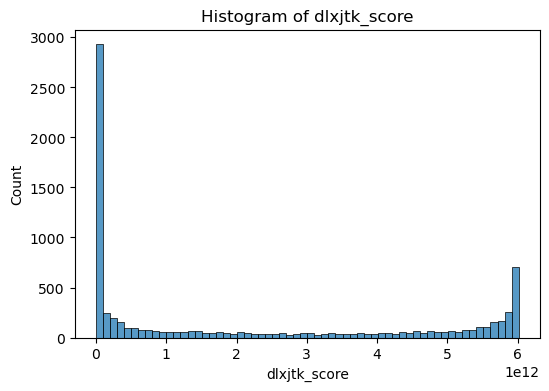

In [38]:
plot_periodicity_histogram(results_path, score_column_name, bins=60, save_path=FIGURE_PATH / 'dlxjtx_histogram.png')

### Visualizing gene expression

In [39]:
TOP_N = 10

Loading periodicity results


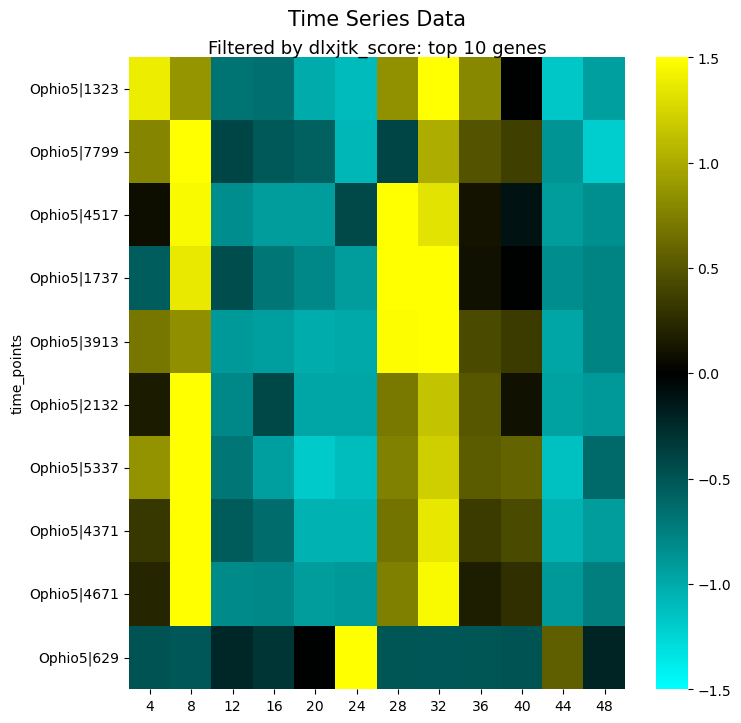

In [40]:
# I would like to view the top 6 genes that pyJTK has ranked as the most periodic in a heatmap. I want to order genes based on their peak expression BEFORE 96 minutes.
plot_heatmap(dataset, results_path, 24, score_column_name, top_genes=TOP_N, save_path=FIGURE_PATH / 'dlxjtx_heatmap_top.png')

Loading periodicity results


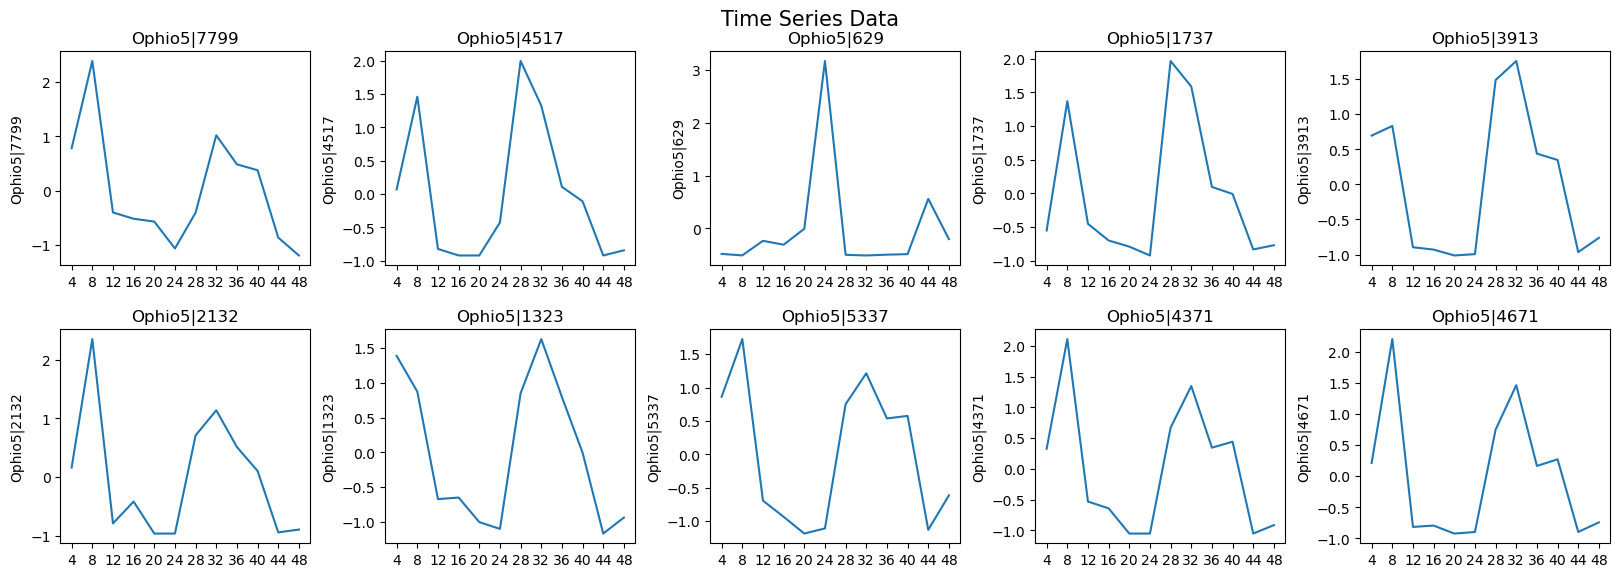

In [41]:
# I also want to inspect their gene expression profiles in a line graph.
# I use this function to just return the gene names from this thresholding method
gene_list = get_genelist_from_top_n_genes(results_path, score_column_name, TOP_N)
# I then supply that list, along with the dataframe, to plot the line graphs. I want to normalize the expression of each gene via z-score transformation.
plot_linegraphs_from_gene_list(dataset, gene_list, norm_data=True, save_path=FIGURE_PATH / f'dlxjtx_linegraphs_top.png')

Loading periodicity results


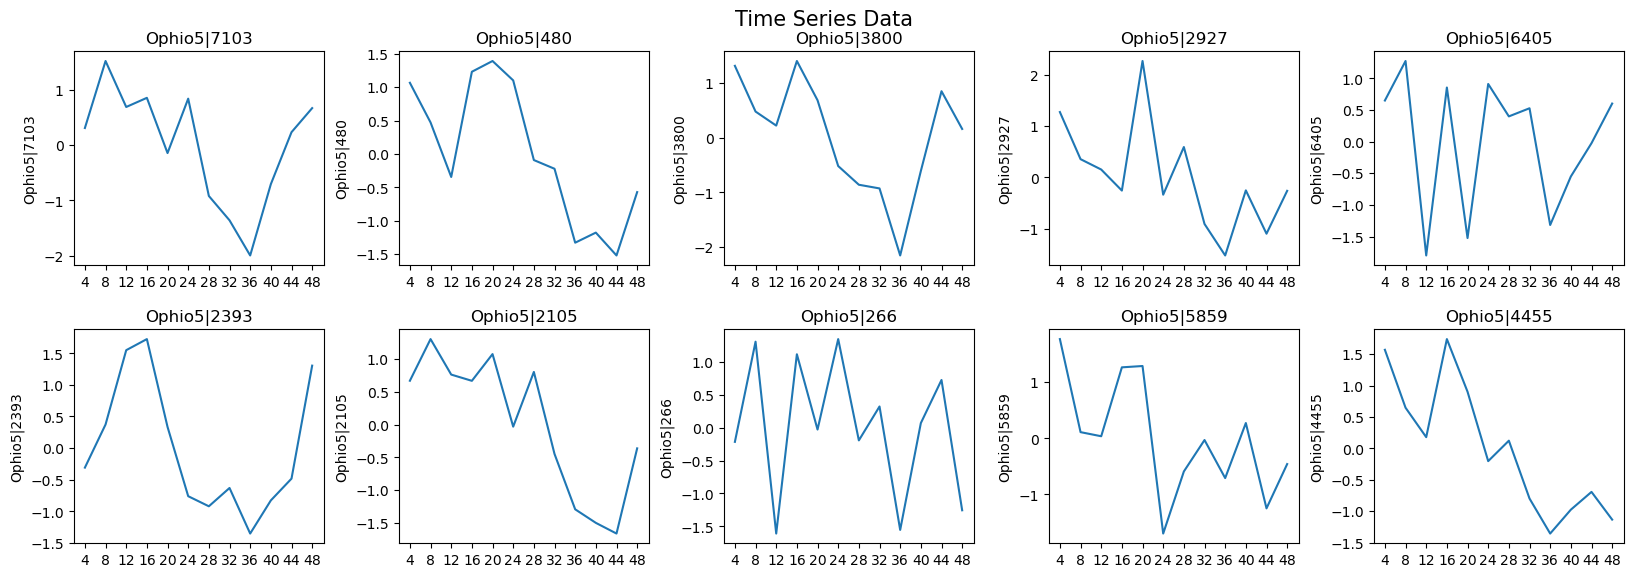

In [42]:
# I also want to inspect their gene expression profiles in a line graph.
# I use this function to just return the gene names from this thresholding method
gene_list = get_genelist_from_top_n_genes(results_path, score_column_name, TOP_N, reverse=True)
# I then supply that list, along with the dataframe, to plot the line graphs. I want to normalize the expression of each gene via z-score transformation.
plot_linegraphs_from_gene_list(dataset, gene_list, norm_data=True, save_path=FIGURE_PATH / f'dlxjtx_linegraphs_bottom.png')

In [43]:
gene_sets = {}
for path in TF_PATH.glob("*.txt"):
    with path.open() as f:
        gene_sets[path.name] = {line.strip() for line in f}

for gene in gene_sets:
    print(f"{gene}: {len(gene_sets[gene])} genes")
print()
print(f"Total sets: {len(gene_sets)}")

gene_set = set()
for genes in gene_sets.values():
    gene_set.update(genes)
print(f"Total genes: {len(gene_set)}")


Fungal_Specific_TF.txt: 93 genes
C2H2_zinc_finger.txt: 19 genes
bZIP.txt: 12 genes
RFX_dna_binding.txt: 1 genes
Helix-loop-helix.txt: 9 genes
Histone-like_TF.txt: 9 genes
CCR4_not_complex.txt: 1 genes
HMG.txt: 7 genes
GCN5-like-1.txt: 1 genes
GATA_type_zinc_finger.txt: 6 genes
CCAAT_binding.txt: 1 genes
Homeodomain.txt: 6 genes
Homeodomain_like_HTH.txt: 1 genes
DDT.txt: 1 genes
SART1.txt: 1 genes
SGT1.txt: 1 genes
Zinc finger_CCHC-type.txt: 5 genes
CP2.txt: 1 genes
Forkhead.txt: 4 genes
STE-like.txt: 1 genes
Helix-turn-helix.txt: 4 genes
TEA_ATTS.txt: 1 genes
ARID_BRIGHT.txt: 3 genes
YL1_nuclear_protein.txt: 1 genes
Zinc_finger_GRF-type.txt: 1 genes
Transcription_factor_TFIIS.txt: 2 genes
Zinc_finger_MIZ-type.txt: 2 genes
SRF-type.txt: 2 genes
Bromodomain_transcription_factor.txt: 3 genes

Total sets: 29
Total genes: 194


Top 20 in intersection: ['Ophio5|6920', 'Ophio5|8604', 'Ophio5|2137', 'Ophio5|8321', 'Ophio5|1479', 'Ophio5|3760', 'Ophio5|491', 'Ophio5|1654', 'Ophio5|392', 'Ophio5|2237', 'Ophio5|84', 'Ophio5|756', 'Ophio5|5850', 'Ophio5|3300', 'Ophio5|512', 'Ophio5|4218', 'Ophio5|8584', 'Ophio5|2056', 'Ophio5|6835', 'Ophio5|997']


,dl_reg_pval,dl_reg_pval_norm,jtk_per_pval,jtk_per_pval_norm,dlxjtk_score
Ophio5|6920,0.00002,0.000036,0.129836,0.129836,7.970954e-02
Ophio5|8604,0.00001,0.000018,0.991495,0.991495,1.773016e+01
Ophio5|2137,0.00142,0.002582,0.129836,0.129836,4.333654e+01
Ophio5|8321,0.00263,0.004782,0.129836,0.129836,2.498914e+02
Ophio5|1479,0.00023,0.000418,0.991495,0.991495,4.789680e+02
...,...,...,...,...,...
Ophio5|8141,0.99969,1.817866,1.000000,1.000000,6.007395e+12
Ophio5|4864,0.99985,1.818157,1.000000,1.000000,6.010280e+12
Ophio5|7020,0.99990,1.818248,1.000000,1.000000,6.011182e+12
Ophio5|4647,0.99994,1.818321,1.000000,1.000000,6.011903e+12


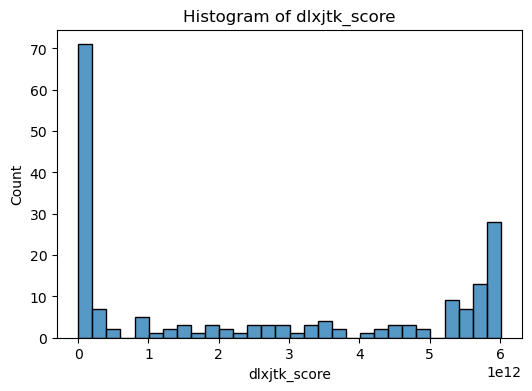

In [44]:
def intersect_results(results_path, gene_set):
    periodicity_df = load_results(results_path)
    return periodicity_df[periodicity_df.index.isin(gene_set)]

tf_intersect_df = intersect_results(results_path, gene_set)
tf_intersect_df = tf_intersect_df.sort_values(by=score_column_name)

TOP_N = 20
print(f"Top {TOP_N} in intersection: {list(tf_intersect_df.head(TOP_N).index)}")
plot_periodicity_histogram(tf_intersect_df, score_column_name, bins=30)
tf_intersect_df

### Applying LEMpy and visualizing networks

In [45]:
top_10_lem_path = "/home/mml66/biological_clocks_class/results/Okimflemingiae_DD_RPKM__20251111115822_lempy"
top_15_lem_path = "/home/mml66/biological_clocks_class/results/Okimflemingiae_DD_RPKM__20251111120751_lempy"
top_20_lem_path = "/home/mml66/biological_clocks_class/results/Okimflemingiae_DD_RPKM__20251111121609_lempy"

In [46]:
def get_lem_df(path):
    all_scores_file = os.path.join('summaries', 'ts0', 'allscores_ts0.tsv')
    return pd.read_csv(os.path.join(path, all_scores_file), sep='\t', index_col=0, comment='#')

def make_ranked_network_from_path(path, degree: int):
    lem_df = aggregate_lem_results(path)
    filtered_lem_df = filter_top_regulators_per_target(lem_df, k=degree)
    network = make_ranked_network(filtered_lem_df)
    return network

def make_top_edge_network_from_path(path: str, top_n_edges: int):
    return make_top_edge_network(get_lem_df(path), top_n_edges=top_n_edges)

#### Top regulator for each target

In [47]:
make_ranked_network_from_path(top_10_lem_path, 1)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …

In [48]:
make_ranked_network_from_path(top_15_lem_path, 1)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …

In [49]:
make_ranked_network_from_path(top_20_lem_path, 1)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …

#### Top 2 regulators for each target

In [50]:
make_ranked_network_from_path(top_10_lem_path, 2)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …

In [51]:
make_ranked_network_from_path(top_15_lem_path, 2)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …

In [52]:
make_ranked_network_from_path(top_20_lem_path, 2)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …

#### Top regulators across all targets

In [53]:
make_top_edge_network_from_path(top_10_lem_path, 10)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …

In [54]:
make_top_edge_network_from_path(top_15_lem_path, 15)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …

In [55]:
make_top_edge_network_from_path(top_20_lem_path, 20)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …